In [1]:
# compute
import numpy as np

# interpolation and triangulation
import scipy.interpolate
import scipy.spatial
import matplotlib.tri

# colormapping
import matplotlib.cm
import matplotlib.colors

import matplotlib.pyplot as plt
%matplotlib inline

/Users/baart_f/.virtualenvs/main/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
xyz = np.loadtxt('/Users/baart_f/Downloads/6650x5000, zonder zandmotor (2).xyz')

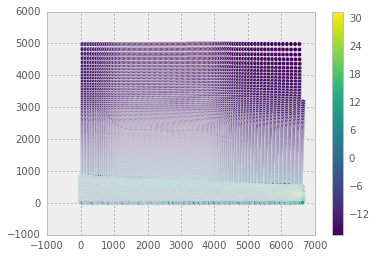

In [3]:
plt.scatter(xyz[:,0], xyz[:,1], c=xyz[:,2], cmap='viridis')
plt.colorbar()

In [4]:
# we need a few extra points around the edge so we know that we have a square
# define an interpolation function
L = scipy.interpolate.NearestNDInterpolator(xyz[:,:2], xyz[:,2])
xmin = xyz[:,0].min()
xmax = xyz[:,0].max()
ymin = xyz[:,1].min()
ymax = xyz[:,1].max()

Y, X = np.mgrid[(ymin-20):(ymax+20):200, (xmin-20):(xmax+20):2j]
xy_extra = np.c_[X.ravel(), Y.ravel()]
# create a xyz
xyz_extra = np.hstack((xy_extra, L(xy_extra)[:,np.newaxis]))
# append to xyz
xyz = np.vstack((xyz, xyz_extra))
Y, X = np.mgrid[(ymin-20):(ymax+20):2j, (xmin-20):(xmax+20):200]
xy_extra = np.c_[X.ravel(), Y.ravel()]
# create xyz
xyz_extra = np.hstack((xy_extra, L(xy_extra)[:,np.newaxis]))
# append to xyz
xyz = np.vstack((xyz, xyz_extra))


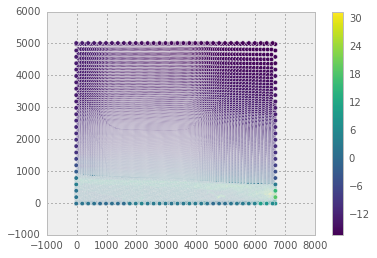

In [5]:
# now we have a regular outer boundary
plt.scatter(xyz[:,0], xyz[:,1], c=xyz[:,2], cmap='viridis')
plt.colorbar()

In [6]:
# define a triangular mesh
tri = matplotlib.tri.Triangulation(xyz[:,0], xyz[:,1])


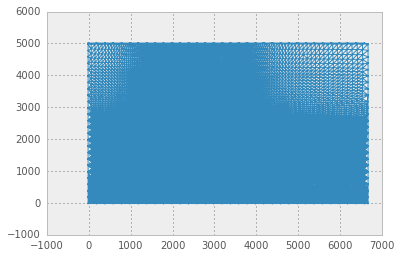

In [7]:
# this should look somewhat regular, it's the basis for the mesh
_ = plt.triplot(tri)

In [8]:
# convert from world to engineering coordinates (our local sandbox)
# also cleanup and rescale vertical > 0 different from vertical < 0
def x2bak(x):
    # from 6650m to 1.33m
    result = (x/6650.0)*1.33
    return result
def y2bak(y):
    # from 0,5000 to 1m
    result = (y/5000.0)*1.0
    return result
def z2bak(z):
    # chop
    z[z < -12] = -12
    z[z > 0] *= 0.5
    z[z > 12] = 12
    
    # raise to 0
    z -= -12
    # from 0,24 to 0.20
    result = (z/24.0)*0.2
    return result
xyz_scaled = np.c_[
    x2bak(xyz[:,0].copy()),
    y2bak(xyz[:,1].copy()),
    z2bak(xyz[:,2].copy())
]

In [9]:
# rescale z to 0,1 for computing colors
N = matplotlib.colors.Normalize(xyz[:,2].min(), xyz[:,2].max())

In [10]:
# see https://github.com/dranjan/python-plyfile
# compute vertex array (bit of hack with the tulpes)
vertex = np.array([
        tuple(row) 
        for row
        in xyz_scaled.tolist()
    ], dtype=[
        ('x', 'f4'),
        ('y', 'f4'),
        ('z', 'f4')
    ])

# create a list of tuples followed by red,green,blue
facelist = []
for triangle in tri.triangles:
    z_triangle = xyz[triangle[0], 2]
    r, g, b, a = matplotlib.cm.gist_earth(N(z_triangle), bytes=True)
    facelist.append((triangle, r, g, b))
    
face = np.array(facelist,
                dtype=[
        ('vertex_indices', 'i4', (3,)),
        ('red', 'u1'), ('green', 'u1'),
        ('blue', 'u1')
    ])


In [11]:
import plyfile

ply = plyfile.PlyData([
        plyfile.PlyElement.describe(
                vertex, 'vertex',
                comments=['tetrahedron vertices']
        ),
        plyfile.PlyElement.describe(face, 'face')
    ],
    text=True, 
    byte_order='=',
    comments=['single tetrahedron with colored faces']
)
ply.write('filename.ply')


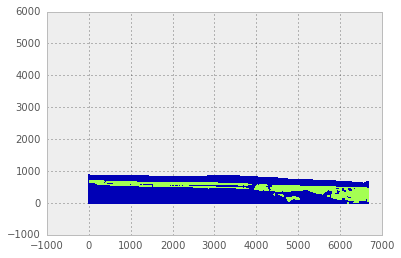

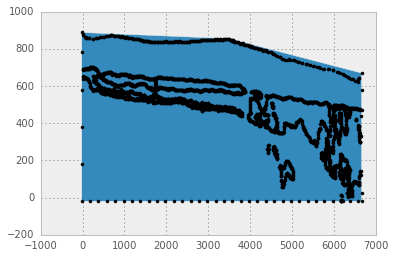

In [48]:
contour = contours.allsegs[0][0]
plt.plot(contour[:,0], contour[:,1], 'k.')
hull = scipy.spatial.ConvexHull(contour)
plt.fill(*hull.points[hull.vertices].T)

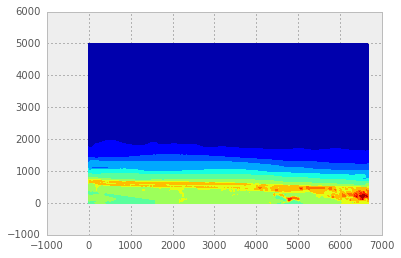

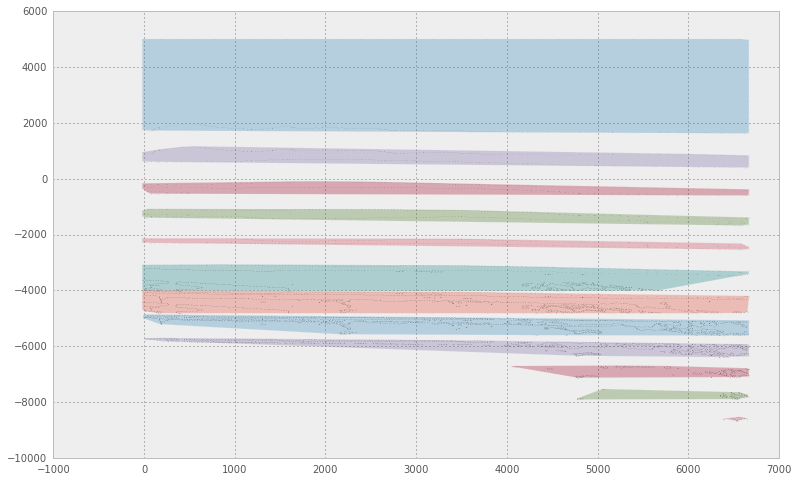

In [97]:

contours = plt.tricontourf(tri, xyz_scaled[:,2], np.arange(0, 0.2+0.018, 0.018))
plt.subplots(figsize=(13, 8))
for i, segment in enumerate(contours.allsegs):
    contour = segment[0]
    plt.plot(contour[:,0], contour[:,1] + i * -800, 'k.', alpha=0.2, markersize=0.3)
    hull = scipy.spatial.ConvexHull(contour)
    hull_points = hull.points[hull.vertices]
    plt.fill(hull_points[:,0], hull_points[:,1] + i * -800, alpha=0.3)

In [87]:
len(tri.x), len(xyz_scaled),len(xyz[:,2])

(25173, 25173, 25173)

In [89]:
np.mgrid[0:10:3kj, 0:3]

(25173, 3)

In [76]:
j = 4
complex(1, 0.2)

(1+0.2j)